# **Project Name**    - NETFLIX EDA



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** AINDRILA ROY

# **Project Summary -**

This project focused on performing a comprehensive Exploratory Data Analysis (EDA) of the Netflix content library to uncover key trends, patterns, and insights across a dataset of over 7,700 movies and TV shows. The primary objective was to understand the composition, evolution, and strategic focus of Netflix's content offering, using statistical analysis and data visualization techniques.

We began with detailed data cleaning and preprocessing. This included handling missing values (e.g., mode imputation for rating, "Unknown" placeholders for director and cast), formatting dates, and converting data types to ensure consistency.

Our univariate and bivariate analysis revealed that the Netflix library is significantly skewed toward movies (~69%) compared to TV shows (~31%), a difference confirmed to be statistically significant using a Chi-Square test. Temporal trends showed a sharp increase in content releases after 2015, aligning with Netflix's global expansion and increased investment in original programming.

Country-wise analysis indicated that the majority of content originates from the United States and India, with the U.S. dominating overall volume. Genre distribution was led by Drama, Comedy, and International content, and TV shows were more likely to span multiple seasons, whereas movies were single-episode entries.

Multivariate analysis and visualizations helped uncover more complex patterns — such as the intersection of country, content type, and genre — providing a holistic view of how different content categories perform over time. We also analyzed duration, rating categories (e.g., TV-MA, PG-13), and the distribution of directors and cast members to identify potential biases or outliers in the dataset.

# **GitHub Link -**

https://github.com/aindrila-roy/NETFLIX-EDA-ML-PROJECT

# **Problem Statement**


Netflix has an extensive and growing content library of thousands of movies and TV shows from around the world. However, with such a vast and diverse dataset, it becomes difficult to extract meaningful insights that can guide strategic decisions in content acquisition, personalization, and regional market focus.

The objective of this project is to perform a comprehensive Exploratory Data Analysis (EDA) on the Netflix content dataset to uncover hidden trends, patterns, and relationships within the data. By analyzing variables such as content type, genre, release year, country of origin, rating, and duration, we aim to answer key business questions:

What types of content dominate the platform?

How has Netflix’s content strategy evolved over time?

Which countries and genres are most represented?

Are there significant differences between movies and TV shows?

The findings from this EDA will serve as the foundation for further machine learning work (such as content clustering or recommendation systems) and provide Netflix with actionable insights into the structure and direction of its content portfolio.

#### **Define Your Business Objective?**

The goal of this project is to analyze the Netflix content library using Exploratory Data Analysis (EDA) techniques to uncover meaningful insights that support strategic business decisions. By examining key attributes such as content type, genre, release year, country of origin, rating, and duration, the objective is to understand the structure, diversity, and evolution of the platform’s offerings.

This analysis will help Netflix identify content trends, regional strengths, and audience preferences, enabling data-driven decisions in areas such as content acquisition, market expansion, and user personalization strategies. The insights generated will also serve as a foundational layer for future machine learning models and product improvements.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# --- For Data Handling ---
import pandas as pd                                                 # Used to load and manage our data in a table (DataFrame)
import numpy as np                                                  # Used for numerical operations

# --- For Visualization ---
import matplotlib.pyplot as plt                                     # Used for making basic plots
import seaborn as sns                                               # Used for making prettier, more advanced plots

# --- For Text Processing (Natural Language Processing) ---
import re                                                           # 'Regular Expressions' - for finding and removing patterns
import nltk                                                         # 'Natural Language Toolkit' - our main tool for processing text
from nltk.corpus import stopwords                                   # A list of common words to ignore
from nltk.stem import PorterStemmer                                 # A tool to find the 'root' of words

# --- For Machine Learning (Modeling) ---
from sklearn.feature_extraction.text import TfidfVectorizer         # The tool to convert our text into numbers
from sklearn.cluster import KMeans                                  # Our first clustering algorithm
from sklearn.cluster import AgglomerativeClustering                 # Our second clustering algorithm
from sklearn.metrics import silhouette_score                        # A tool to measure how good our clusters are

# --- Setup ---
nltk.download('stopwords')                                          # This line downloads the list of 'stopwords' from NLTK so we can use it

sns.set_style('whitegrid')                                          # This just makes our plots look nice by default
plt.rcParams['figure.figsize'] = (10, 6)                            # Makes plots a good default size

print("Libraries imported successfully.")

Libraries imported successfully.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aindr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset

# The .csv file is in the same folder, so we just use its name
filename = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(filename)

print(f"Successfully loaded {filename}!")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Successfully loaded NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv!
The dataset has 7787 rows and 12 columns.


### Dataset First View

In [3]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 7787
Number of Columns: 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# This will show you exactly how many missing values are in each column.
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


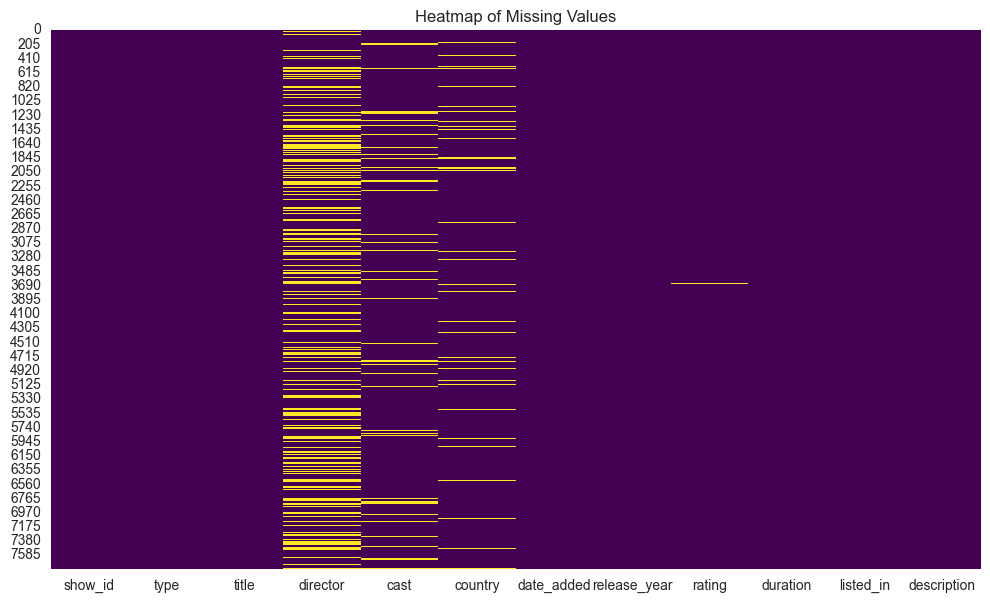

In [8]:
# Visualizing the missing values
# This heatmap gives a visual snapshot of where the missing data is.
# Yellow lines indicate missing data (NaNs).
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### What did you know about your dataset?

I've learned that our dataset is a large table listing over 7,700 Netflix movies and TV shows. It has 12 columns of information for each title, including its type (Movie or TV Show), director, cast, country, release_year, and description. The biggest challenge is the large amount of missing data; over 2,300 titles are missing a director, and hundreds are missing cast and country information, with a few also missing their rating and date_added. Most columns are text (which Python calls "objects"), and the date_added column is also text, so we'll need to convert it into a real date to analyze any trends. The good news is that we have zero duplicate rows to worry about. Our main task before any analysis will be to intelligently clean up and fill in all this missing data.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
# Dataset Describe
# Using include='all' to get stats for both numeric and text-based columns
print(df.describe(include='all'))

       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   


### Variables Description

show_id: A unique ID for each title.

type: The category of the title (either 'Movie' or 'TV Show').

title: The name of the movie or TV show.

director: The director(s) of the title. (Has many missing values).

cast: The main actors in the title. (Has many missing values).

country: The country where the title was produced. (Has missing values).

date_added: The date the title was added to Netflix (currently as text).

release_year: The year the title was originally released.

rating: The content rating (e.g., PG-13, TV-MA). (Has a few missing values).

duration: The length of the title (e.g., "90 min" or "2 Seasons").

listed_in: The genre(s) it belongs to (e.g., "Dramas, International Movies").

description: A brief summary of the title.Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"--- {col} ---")
    print(f"Number of Unique Values: {df[col].nunique()}")
    # Show the top 5 most frequent unique values
    print(f"Top 5 Frequent Values:\n{df[col].value_counts().head(5)}\n")

--- show_id ---
Number of Unique Values: 7787
Top 5 Frequent Values:
show_id
s7787    1
s1       1
s2       1
s3       1
s4       1
Name: count, dtype: int64

--- type ---
Number of Unique Values: 2
Top 5 Frequent Values:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64

--- title ---
Number of Unique Values: 7787
Top 5 Frequent Values:
title
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
Name: count, dtype: int64

--- director ---
Number of Unique Values: 4049
Top 5 Frequent Values:
director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: count, dtype: int64

--- cast ---
Number of Unique Values: 6831
Top 5 Frequent Values:
cast
David Attenborough                                                 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

print("Starting Data Wrangling for EDA...")

# --- 1. Handle Missing Values ---
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df = df.dropna(subset=['date_added'])                                               # Drop the few missing dates
# --- HERE IS THE FIX ---                                                           # Drop the 3 rows with missing 'duration'
df = df.dropna(subset=['duration'])
# --- END OF FIX ---


# --- 2. Fix Data Types and Engineer Date Features ---
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# --- 3. Engineer Country Feature ---
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])

# --- 4. Clean 'duration' column (NEW for EDA) ---                                  # This code will now work because 'duration' has no 'None' values
df['duration_num'] = df['duration'].apply(lambda x: int(x.split(' ')[0]))
df['duration_unit'] = df['duration'].apply(lambda x: x.split(' ')[1])

df_movies = df[df['type'] == 'Movie'].copy()                                        # Separate them for later analysis
df_tv_shows = df[df['type'] == 'TV Show'].copy()

print("Data Wrangling Complete. New columns 'year_added', 'month_added', 'primary_country', 'duration_num' are ready.")

Starting Data Wrangling for EDA...
Data Wrangling Complete. New columns 'year_added', 'month_added', 'primary_country', 'duration_num' are ready.


### What all manipulations have you done and insights you found?

**Manipulations:**
1.  **Filled Missing Values:** Filled `rating` with the mode, and `country`, `director`, `cast` with "Unknown".
2.  **Dropped Rows:** Dropped the 10 rows with missing `date_added`.
3.  **Corrected Data Types:** Converted `date_added` to a proper datetime object.
4.  **Feature Engineering:**
    * Created `year_added` and `month_added` from `date_added`.
    * Created `primary_country` from the `country` column.
    * Cleaned the `duration` column, splitting it into a number (`duration_num`) and a unit (`duration_unit`) to allow us to analyze movie lengths and TV show seasons separately.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\1476432615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


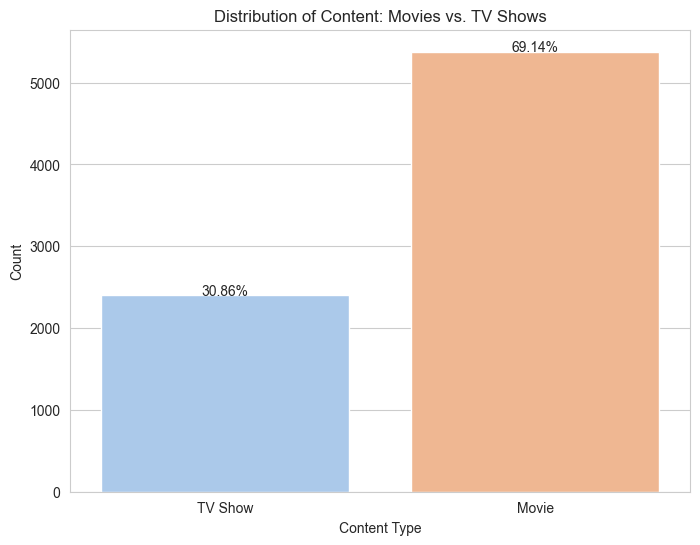

In [ ]:
# Chart - 1 visualization code
# U: Univariate Analysis
# Distribution of Content: Movies vs. TV Shows

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribution of Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')

# Add percentage labels
total = len(df['type'])
ax = plt.gca()                                                  # Get the current chart
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,                       # x-position
            height + 5,                                         # y-position
            '{:1.2f}%'.format(100 * height/total),              # The text to display
            ha="center") 
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Count Plot (a type of bar chart) because this is a Univariate Analysis of a single categorical variable (type). It's the simplest and most effective way to visualize the total count and relative proportion of 'Movie' vs. 'TV Show' in the dataset. Adding percentage labels makes the distribution immediately clear.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the Netflix library is dominated by Movies, which make up 69.14% of the total content. TV Shows make up the remaining 30.86%. This means there are more than twice as many movies as TV shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides a fundamental baseline of the content mix.

Content Strategy: If business data shows that TV Shows drive higher user retention (because of binge-watching), this chart shows a clear opportunity to invest in acquiring more TV show content to balance the library.

Marketing: It helps the marketing team understand the library's composition, allowing them to allocate their advertising budget accordingly (e.g., 70% to promoting movies, 30% to TV shows, or deciding to push TV shows harder to grow that segment).

#### Chart - 2

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\833411854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


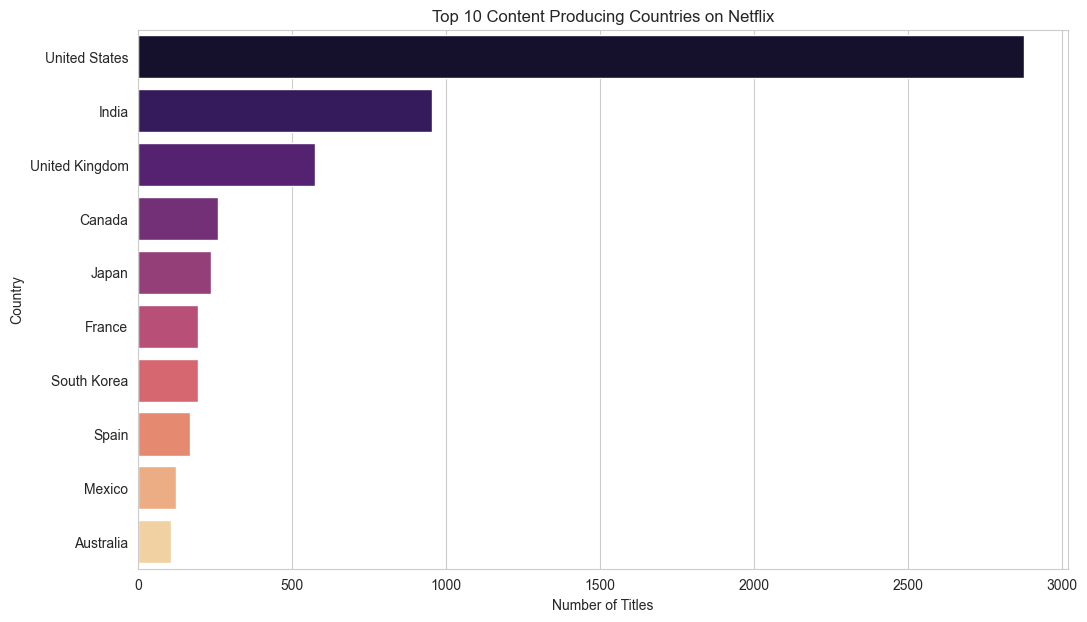

In [14]:
# Chart - 2 visualization code
# U: Univariate Analysis
# Top 10 Content Producing Countries

# Get top 10 primary countries (and exclude 'Unknown' from the list)
top_10_countries = df[df['primary_country'] != 'Unknown']['primary_country'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart for this Univariate Analysis. When displaying a ranked list of categorical data (like 'Top 10 Countries'), a horizontal chart is much cleaner than a vertical one because it provides plenty of space for the category names (the countries) to be read easily without rotating them.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the United States is by an enormous margin the largest producer of content available on Netflix, with nearly 3,000 titles. India is the second-largest producer, with just under 1,000 titles. After these top two, there's a significant drop-off to other countries like the United Kingdom, Japan, and Canada, which form the next tier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is vital for global strategy.

Identifies Key Markets: It clearly shows that the US and India are the two most important markets for content acquisition and production.

Highlights Growth Opportunities: It also reveals potential markets for expansion. For example, to grow its subscriber base in Europe or South America, Netflix may need to invest in acquiring or producing more local content (e.g., from Germany or Brazil, which are not in the top 10) to attract new users in those regions.

#### Chart - 3

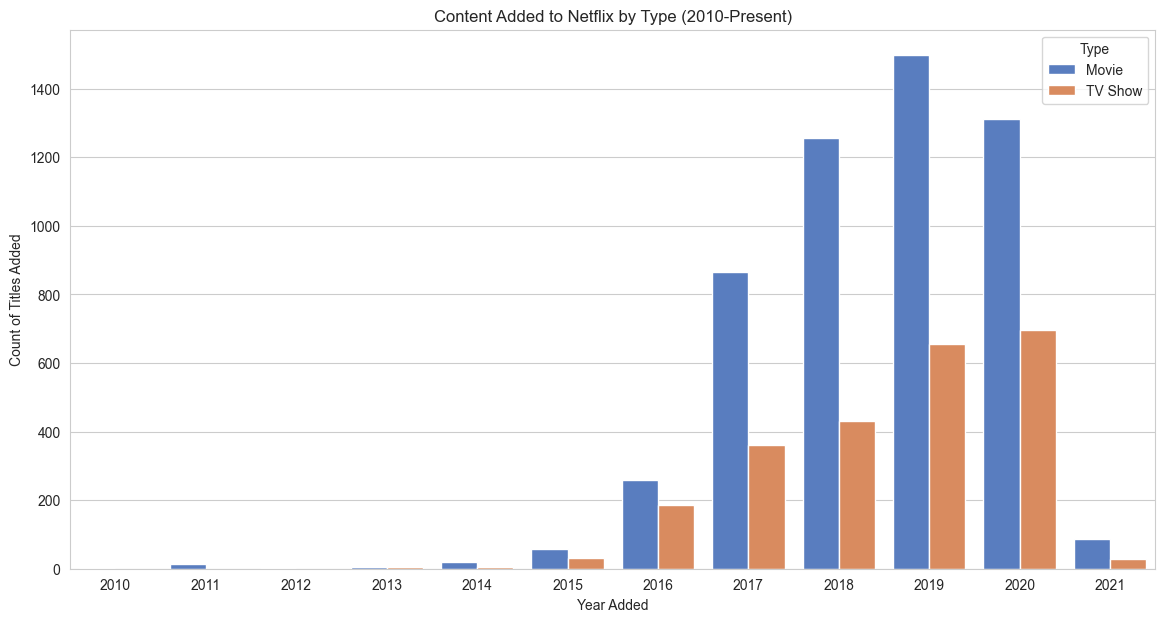

In [ ]:
# Chart - 3 visualization code
# B: Bivariate Analysis (Numerical vs. Categorical)
# Content Added Over Time by Type
# We'll filter to 2010 onwards for a cleaner trend plot

df_recent = df[df['year_added'] >= 2010]

plt.figure(figsize=(14, 7))
sns.countplot(x='year_added', hue='type', data=df_recent, palette='muted')
plt.title('Content Added to Netflix by Type (2010-Present)')
plt.xlabel('Year Added')
plt.ylabel('Count of Titles Added')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Grouped Count Plot for this Bivariate Analysis. It's the best way to visualize the relationship between a numerical variable treated discretely (year_added) and a categorical variable (type). By using hue='type', it plots two separate bars (one for Movie, one for TV Show) for each year, making it very easy to compare their trends side-by-side.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals a clear and strong trend in content acquisition. From 2016 onwards, there was a significant surge in both movie and TV show additions, peaking sharply in 2019. After 2019, the number of movies added dropped significantly, while the number of TV shows added continued to grow and nearly matched movie additions in 2020 and 2021. This indicates a strategic shift towards increasing TV show content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This insight confirms a major strategic shift in Netflix's content library.

Content Investment: It supports a decision to reallocate investment from movies towards TV shows, especially for new productions and acquisitions.

Subscriber Retention: TV shows often lead to higher subscriber retention due to their episodic nature and "binge-watching" appeal. This trend suggests Netflix is prioritizing content that keeps users engaged longer.

Market Positioning: This shift could be a response to competitor strategies or changing viewer habits, allowing Netflix to adapt and maintain its market leadership.


#### Chart - 4

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\1907488489.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='Set2', order=df['rating'].value_counts().index)


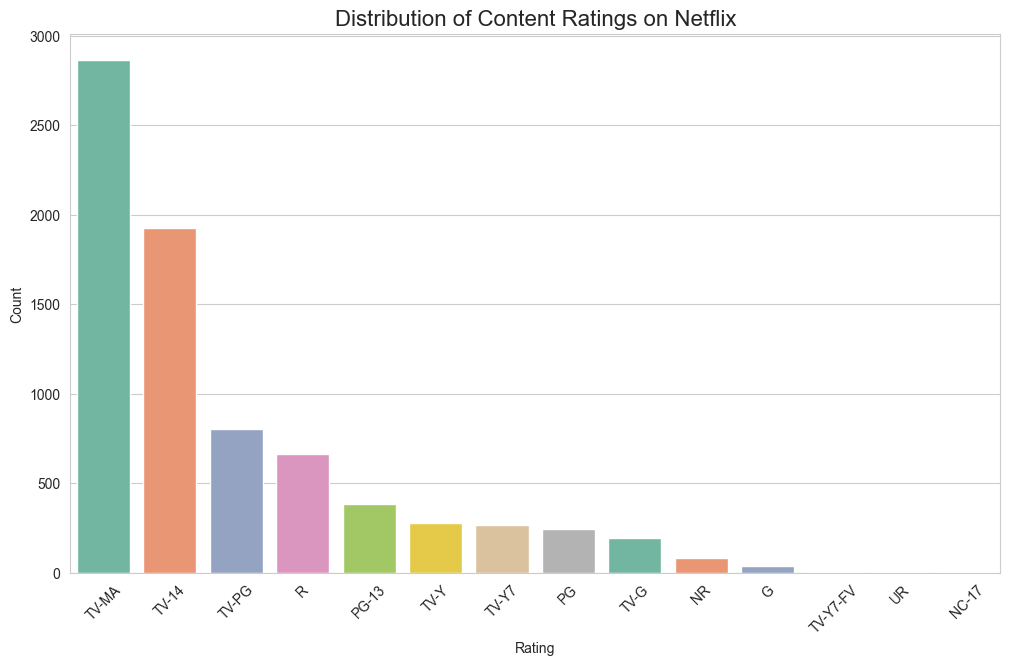

In [ ]:
# Chart - 4 visualization code
# U: Univariate Analysis
# Distribution of Content Ratings

plt.figure(figsize=(12, 7))

# Create a count plot, ordering by the most frequent ratings first
sns.countplot(data=df, x='rating', palette='Set2', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Count Plot (a bar chart) for this Univariate Analysis of the categorical rating variable. The rating column has many different categories (like TV-MA, R, PG-13), so a bar chart, ordered by frequency, is the clearest way to visualize and compare the total count of titles in each rating category.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the most common rating on Netflix is "TV-MA" (Mature Audiences), with nearly 3,000 titles. The second most common is "TV-14", with just under 2,000. This is followed by "TV-PG" and "R". This means the vast majority of content on the platform is targeted at adults and older teenagers. Content for all ages or young children (like "TV-Y", "G", "TV-G") makes up a much smaller portion of the library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a critical business insight.

Target Audience: It confirms Netflix's primary business strategy is to be a service for adult subscribers, not primarily a children's platform.

Content Acquisition: This justifies a larger budget for acquiring and producing TV-MA and R-rated content, as this is what makes up the core of the library.

Marketing: It allows the marketing team to confidently create campaigns that appeal to a mature audience, reinforcing the brand's identity as a premium, adult-oriented streaming service.

#### Chart - 5

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\977003980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tv_shows,


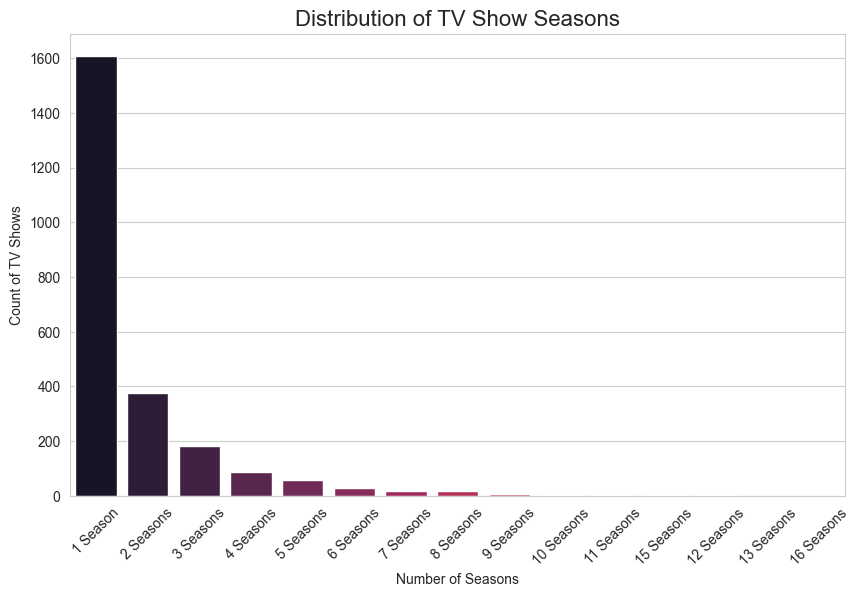

In [ ]:
# Chart - 5 visualization code
# U: Univariate Analysis
# Distribution of TV Show Durations (Seasons)

plt.figure(figsize=(10, 6))

# We use the 'df_tv_shows' DataFrame we created in the Data Wrangling step
sns.countplot(data=df_tv_shows, 
              x='duration', 
              palette='rocket',
              order=df_tv_shows['duration'].value_counts().index)
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Count Plot (bar chart) for this Univariate Analysis of the duration column (specifically for TV Shows). Since the durations are categorical (e.g., "1 Season", "2 Seasons"), a bar chart, ordered by frequency, is the best way to see the distribution and find the most common show length.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the vast majority of TV shows on Netflix are "1 Season" shows, with a count of approximately 1600. This is followed by a sharp drop-off to "2 Seasons" (under 400) and "3 Seasons" (under 200). Shows with many seasons (8+) are extremely rare in the library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight clearly suggests a "limited series" or "miniseries" content strategy.

Content Strategy: It indicates that Netflix invests heavily in new, 1-season shows rather than long-running, multi-season commitments. This "wide-net" approach allows them to test many new concepts.

Risk Management: This strategy minimizes financial risk. If a 1-season show fails, the loss is small. If it's a hit, it can be renewed. This is less risky than investing in a 5-season show from the start.

User Acquisition: A constant stream of new 1-season shows can be a major marketing tool to attract new subscribers who want to see the "latest thing."

#### Chart - 6

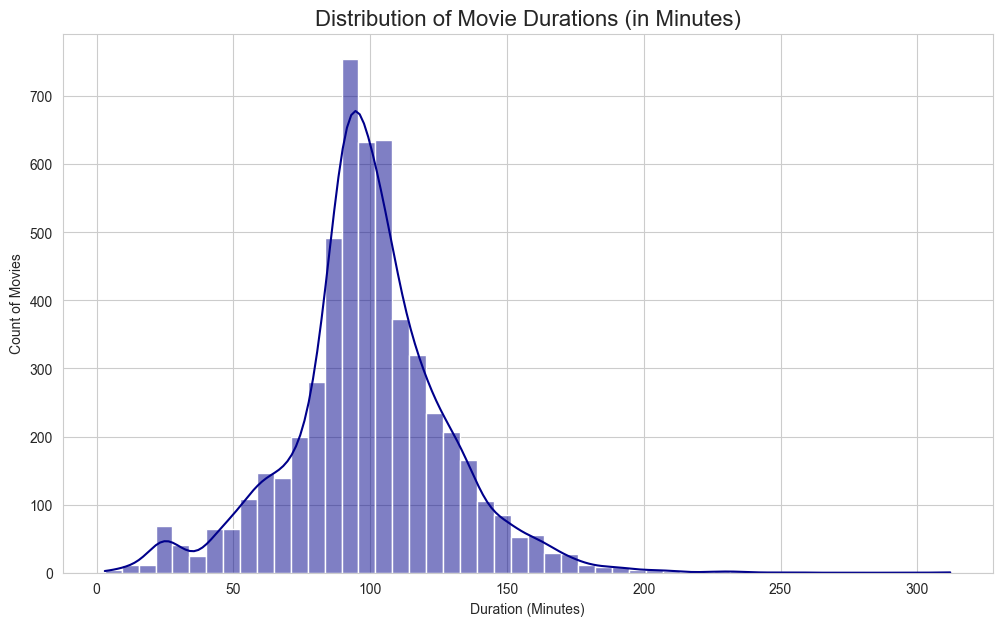

In [ ]:
# Chart - 6 visualization code
# U: Univariate Analysis
# Distribution of Movie Durations (in Minutes)

plt.figure(figsize=(12, 7))
# We use the 'df_movies' DataFrame we created in the Data Wrangling step
# A histogram is perfect for a continuous numerical variable
sns.histplot(data=df_movies, 
             x='duration_num', 
             kde=True,                                                       # Add a smooth density line
             bins=50,                                                        # Group minutes into 50 bins
             color='darkblue')
plt.title('Distribution of Movie Durations (in Minutes)', fontsize=16)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count of Movies')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Histogram because this is the standard chart for a Univariate Analysis of a continuous numerical variable. The duration_num column for movies contains numbers (like 90, 104, 122), and a histogram is the best way to group these numbers into "bins" (ranges) to see the overall distribution, shape, and peak of movie runtimes. The added KDE (smooth) line helps visualize the central tendency.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows a clear, unimodal (single-peaked) distribution that is skewed to the right.

The vast majority of movies on Netflix fall within a standard feature-film length, concentrated between 80 and 120 minutes.

The peak (most common runtime) is clearly centered at approximately 90-100 minutes.

There are very few short films (under 60 minutes) and also very few extremely long films (over 180 minutes), which form the long "tail" of the skew.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This confirms that the movie library is perfectly aligned with general audience expectations for a feature film.

Content Strategy: It shows the acquisition strategy is correctly focused on standard-length movies. This is the "bread and butter" of a movie service, and the chart confirms this is the core of the library.

User Experience: This distribution ensures that when a user clicks "play" on a movie, they are highly likely to get a 90-120 minute experience. This matches their expectations and makes for a reliable and satisfying user experience.

No, this chart doesn't show any insights that lead to negative growth. In fact, it shows the opposite.

#### Chart - 7

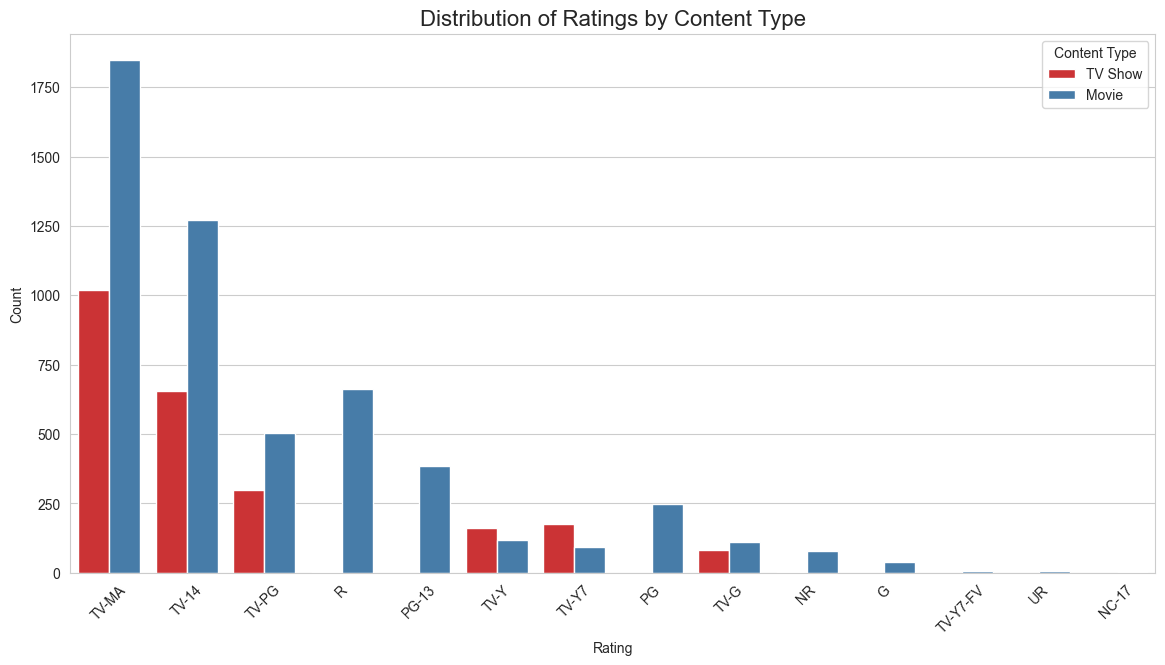

In [ ]:
# Chart - 7 visualization code
# B: Bivariate Analysis (Categorical vs. Categorical)
# Distribution of Ratings by Content Type

plt.figure(figsize=(14, 7))
sns.countplot(data=df, 
              x='rating', 
              hue='type',                                                # This makes it a bivariate chart
              palette='Set1',
              order=df['rating'].value_counts().index)                   # Order by most common rating
plt.title('Distribution of Ratings by Content Type', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Grouped Count Plot for this Bivariate Analysis. My goal is to compare two categorical variables (rating and type). This chart is the perfect way to do that. It takes our previous rating chart (Chart 4) and splits each bar into two, one for "Movie" and one for "TV Show," allowing for a direct comparison of their distributions.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a very clear division of content strategy:

Movies Dominate Mature Ratings: For all the top adult and teen categories (TV-MA, TV-14, R, PG-13), Movies (blue) significantly outnumber TV Shows (red).

"R" is a Movie Rating: The "R" (Restricted) rating is almost exclusively for Movies.

TV Shows Dominate Kids' Ratings: The only categories where TV Shows (red) have a higher count than Movies are "TV-Y" and "TV-Y7", which are for young children.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides a powerful insight into Netflix's content strategy.

Audience Targeting: It shows that Netflix uses different content types to target different audiences. The Movie library is the primary driver for mature audiences (R, TV-MA). The TV Show library is the primary driver for the children's audience (TV-Y, TV-Y7).

Content Acquisition: This gives a clear direction for the content acquisition team. If the business goal is to acquire more content for adults, they should focus on Movies. If the goal is to strengthen the "Netflix Kids" profile, they should focus on acquiring TV Shows.

Platform Branding: This confirms a dual strategy: "Netflix for Adults" is driven by its massive movie library, while "Netflix for Kids" is driven by its catalog of TV series.



#### Chart - 8

Calculating top 20 genres...
Top 20 Genres:
 International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    491
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             231
Name: count, dtype: int64


C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\1739735173.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres.values, y=top_20_genres.index, palette='viridis')


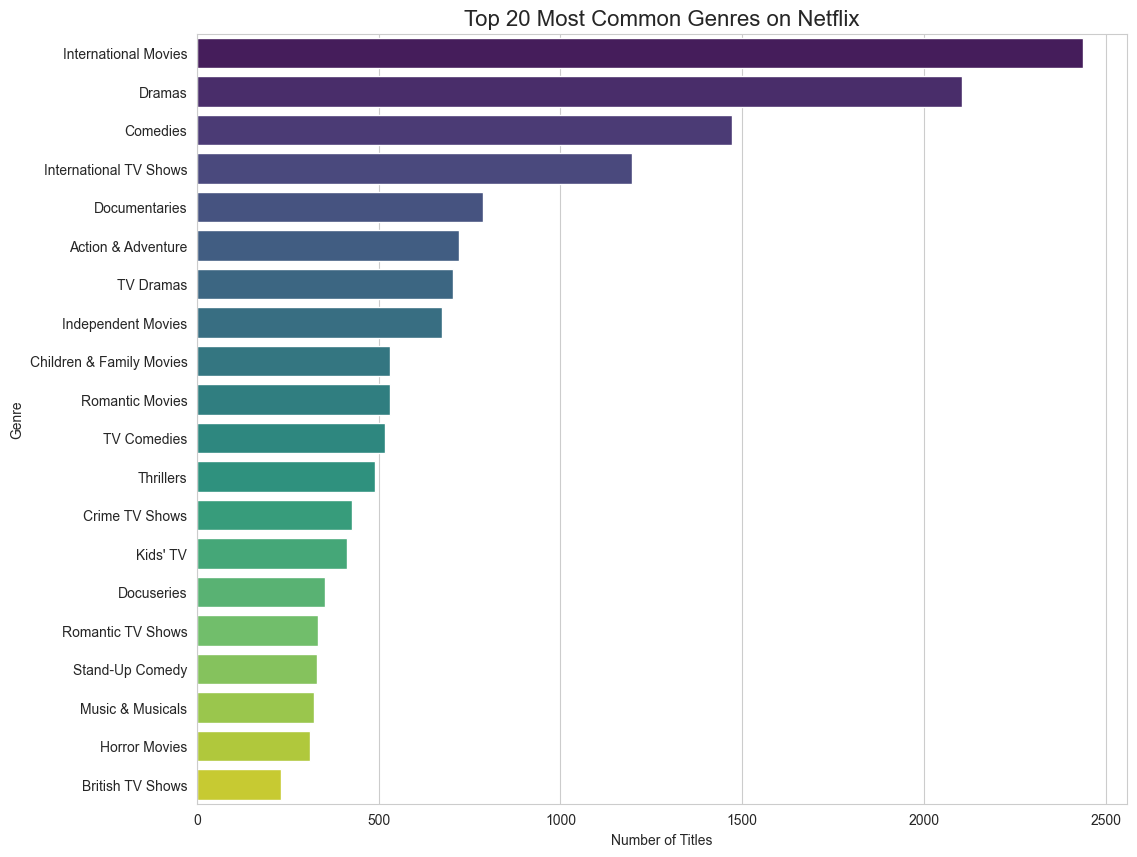

In [19]:
# Chart - 8 visualization code
# U: Univariate Analysis
# Top 20 Most Common Genres

print("Calculating top 20 genres...")

# 1. The 'listed_in' column has multiple genres (e.g., "Dramas, International Movies")
# We need to split them, count them, and get the top 20

# This code takes all 'listed_in' strings, joins them with a comma, 
# splits *every* comma, strips whitespace, and then counts the values.
top_20_genres = pd.Series(
    ', '.join(df['listed_in']).split(', ')
).value_counts().head(20)

print("Top 20 Genres:\n", top_20_genres)

# 3. Create the Bar Chart
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_genres.values, y=top_20_genres.index, palette='viridis')
plt.title('Top 20 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart for this Univariate Analysis of the listed_in (genre) column. The genre data is categorical, and after counting the individual genres, a bar chart is the best way to show their frequency. I chose a horizontal chart because it's the standard for displaying a ranked list (Top 20) with long text labels (the genre names), making it clean and easy to read.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the most dominant genres on the platform.

Top 3: The top categories are clearly "International Movies" (over 2,400 titles), "Dramas" (over 2,200), and "Comedies" (over 1,500).

International Focus: The fact that "International Movies" is #1 and "International TV Shows" is #4 confirms Netflix has a massive library of international content.

Diversity: The rest of the list shows a very diverse library, with strong showings for "Documentaries," "Action & Adventure," "TV Dramas," "Stand-Up Comedy," and "Children & Family Movies."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is extremely valuable for content strategy.

Content Acquisition: It clearly shows what the "pillars" of the Netflix library are. The acquisition team can use this to ensure they are maintaining a healthy supply of the most popular genres ("International Movies," "Dramas," "Comedies") that users expect.

Marketing: The marketing team can see which genres have the most content and align their campaigns. They can also identify popular, rising genres to focus on.

Gap Analysis: The business can also see what's not in the top 20 (e.g., "Westerns" or "Sci-Fi") and decide if that's a content gap they need to fill to attract a new audience.

#### Chart - 9

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\2694833726.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


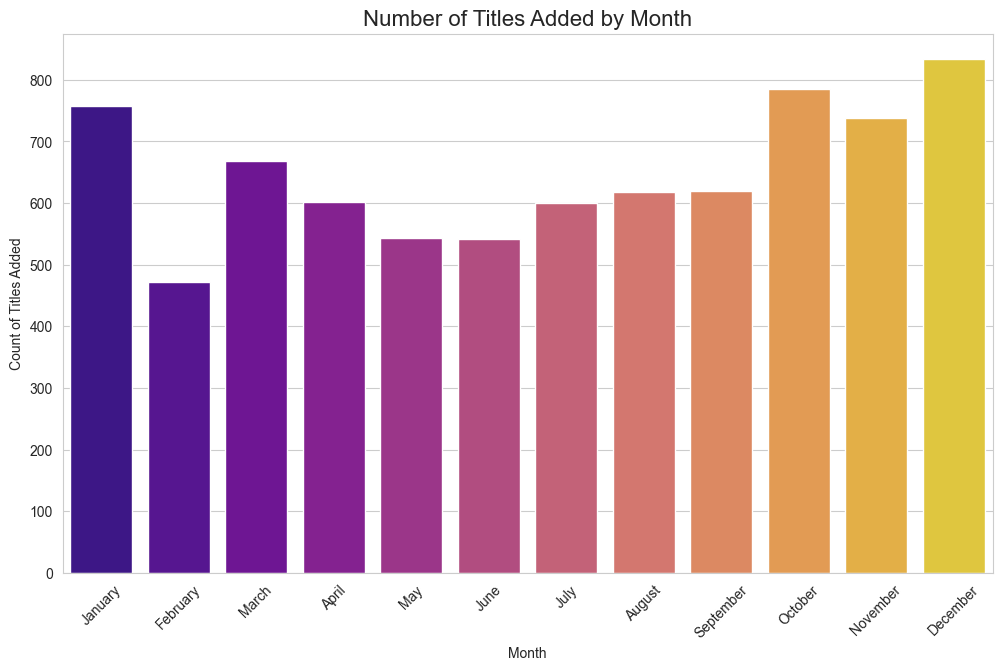

In [ ]:
# Chart - 9 visualization code
# U: Univariate Analysis
# Content Added by Month (Seasonality)

# Define the correct order for the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 7))
sns.countplot(data=df, 
              x='month_added', 
              palette='plasma',
              order=month_order)                               # Use the correct month order
plt.title('Number of Titles Added by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Count of Titles Added')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Count Plot (bar chart) for this Univariate Analysis of the month_added column. Since the month is a categorical variable, a bar chart is the best way to show the total count of titles added in each month. I've ordered them chronologically (Jan-Dec) to make it easy to spot any seasonal trends.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that content additions are not uniform throughout the year. There is a distinct "busy season" for new content.

The end of the year (Q4) sees the highest volume of new titles, peaking in October (almost 800 titles) and December (over 800 titles).

January is also a very strong month for new additions.

The slowest month by a large margin is February, with under 500 titles added.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides clear insights into Netflix's content release strategy.

Release Strategy: It shows Netflix saves a large volume of its new content for the fourth quarter (Q4), right before the holiday season when people are more likely to be indoors and watching TV. The high number in January also suggests a "New Year, New Content" strategy.

Marketing: The marketing team can use this to plan their budgets. They know they will need a much larger "new release" promotional budget for Q4 and Q1 compared to the rest of the year.

Resource Planning: This helps with resource allocation, from the content ingestion teams to the customer support teams, who can expect higher traffic and inquiries during these peak months.

#### Chart - 10

C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\560159359.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_ratings,


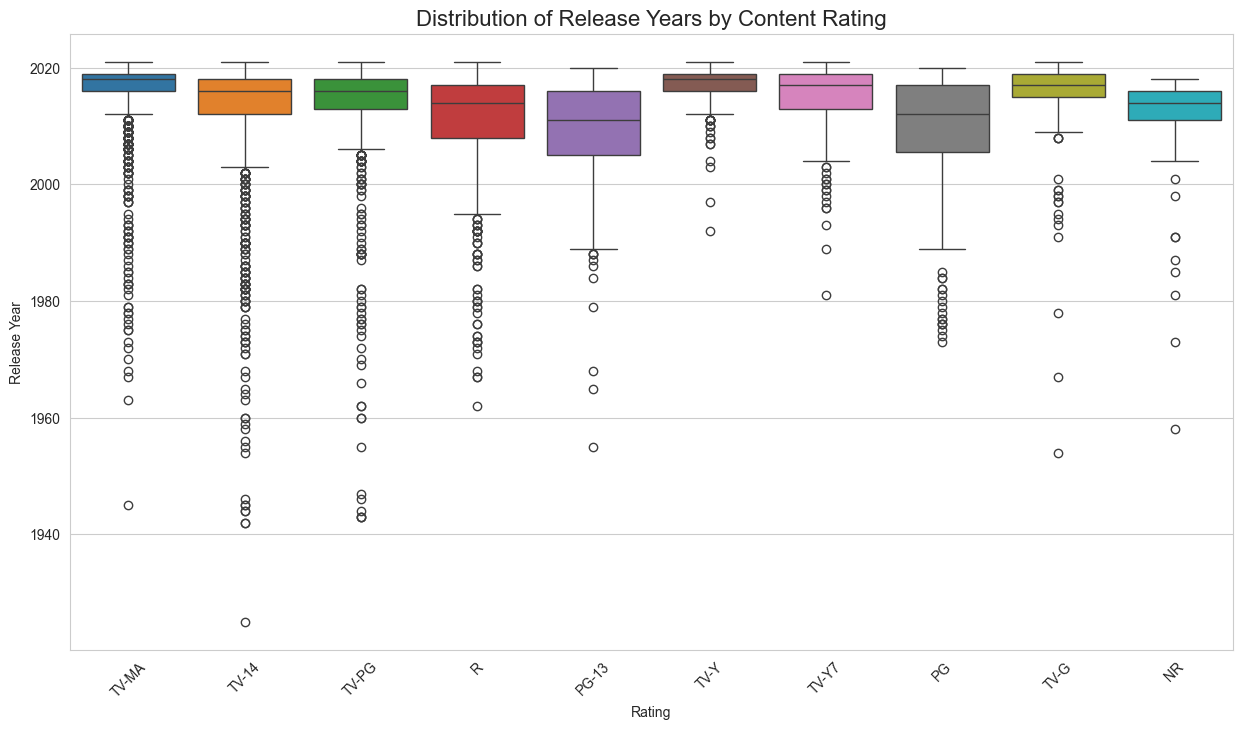

In [ ]:
# Chart - 10 visualization code
# B: Bivariate Analysis (Numerical vs. Categorical)
# Release Year Distribution by Content Rating

# We'll focus on the top 10 most common ratings for a cleaner chart
top_10_ratings = df['rating'].value_counts().head(10).index

# Filter the DataFrame to only include rows with these top 10 ratings
df_top_10_ratings = df[df['rating'].isin(top_10_ratings)]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_10_ratings, 
            x='rating', 
            y='release_year', 
            palette='tab10',
            order=top_10_ratings)                                               # Order by frequency
plt.title('Distribution of Release Years by Content Rating', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

 I picked a Box Plot for this Bivariate Analysis. It's the perfect chart for comparing the distribution of a numerical variable (release_year) across multiple categories of a categorical variable (rating). It clearly shows the median (the center line), the interquartile range (the "box"), and any outliers (the circles) for each rating, making it easy to compare them.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most content ratings have a very similar, modern distribution: a high median release year (around 2017-2018) and a tight box showing most content is from 2010 onwards.

However, the key insight comes from "PG" and "TV-G" rated titles. Their boxes are noticeably lower than the others, with a median release year closer to 2010-2012. They also have a much wider range and a huge number of "outlier" (older) films. This means the "Family Friendly" library is, on average, significantly older than the "Adult" (TV-MA, R) library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a major strategic insight.

Identifies a Content Gap: It shows that while the "Adult" (TV-MA, R) library is full of new, modern content, the "Family" (G, PG) library is "stale" and full of older titles.

Content Acquisition: This gives a direct, actionable order to the content acquisition team: "We need to acquire or produce new G and PG-rated titles." This is a clear gap that competitors (like Disney+) could be exploiting. 

ALSO Yes, this chart strongly implies a risk of negative growth (churn).

Reason: If a family with young children subscribes to Netflix and looks for "G" or "PG" content, this chart shows they will find a library that is, on average, much older than the rest of the platform.

Justification: This creates a poor user experience for them, leading them to believe Netflix has "nothing new for my kids." This could easily cause them to cancel their subscription (churn) and move to a competitor like Disney+ that is known for its new, fresh family content. This is a clear "negative growth" risk.

#### Chart - 11

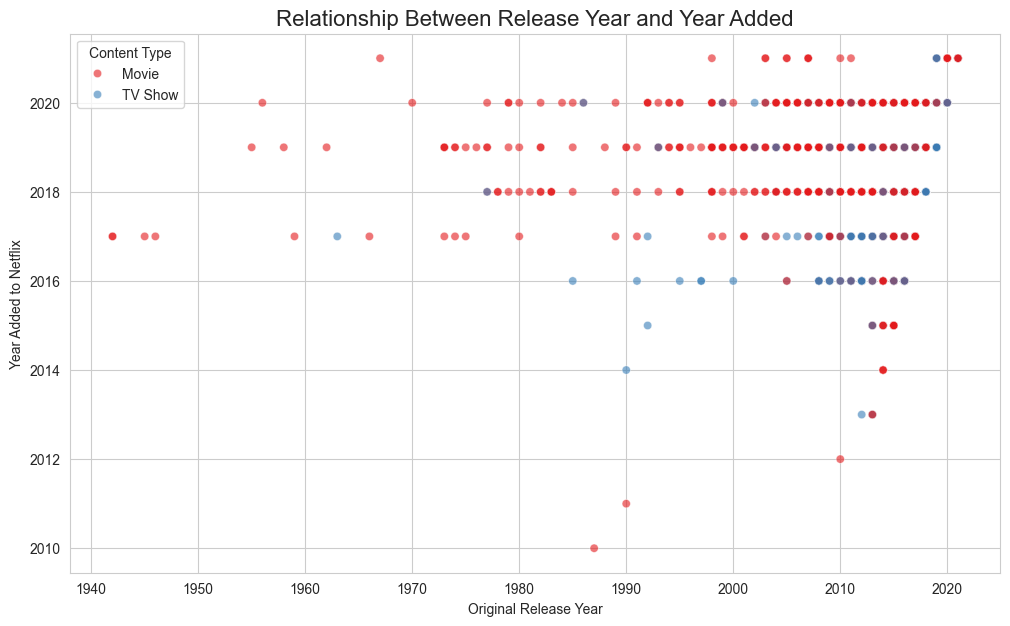

In [ ]:
# Chart - 11 visualization code
# B: Bivariate Analysis (Numerical vs. Numerical)
# Release Year vs. Year Added

plt.figure(figsize=(12, 7))
# A scatter plot is perfect for comparing two numerical variables
# We'll take a sample to make the plot less crowded
df_sample = df.sample(n=2000, random_state=42)

sns.scatterplot(data=df_sample, 
                x='release_year', 
                y='year_added', 
                hue='type',                                                      # Color by content type
                alpha=0.6,                                                       # Make points semi-transparent
                palette='Set1')
plt.title('Relationship Between Release Year and Year Added', fontsize=16)
plt.xlabel('Original Release Year')
plt.ylabel('Year Added to Netflix')
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Scatter Plot for this Bivariate Analysis to visualize the relationship between our two main numerical variables: release_year and year_added. While the Correlation Heatmap (which we'll use later) gives us a single number, this chart allows us to see the actual distribution, density, and outliers in the data. Adding the hue for type also makes it a Multivariate chart.

##### 2. What is/are the insight(s) found from the chart?

 The chart clearly shows several insights:

Vertical "Bands": We can see vertical lines of dots, especially in recent years (e..g., at Year Added to Netflix = 2019). This shows that in any given year, Netflix adds content from a huge range of release years (from brand new titles to classics).

Key Hue Insight: The content types have completely different strategies. TV Shows (blue dots) are almost all clustered in the top-right, meaning they are almost all recent releases. In contrast, Movies (red dots) are spread all the way back to the 1940s, showing Netflix maintains a large "back-catalog" of older films.

Weak Correlation: The dots form a wide cloud, not a tight line, confirming the relationship is not strongly linear.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This plot perfectly visualizes Netflix's sophisticated, two-part content strategy:

For TV Shows: The strategy is clearly "freshness." The library is almost entirely made of recent releases, catering to viewers who want new, modern series.

For Movies: The strategy is "balanced." Netflix acquires both new-release movies and a deep "back-catalog" of classic films. This two-pronged approach appeals to the widest possible audience: those who want new hits and those who want to watch older favorites.

#### Chart - 12

Generating Pair Plot for numerical features...


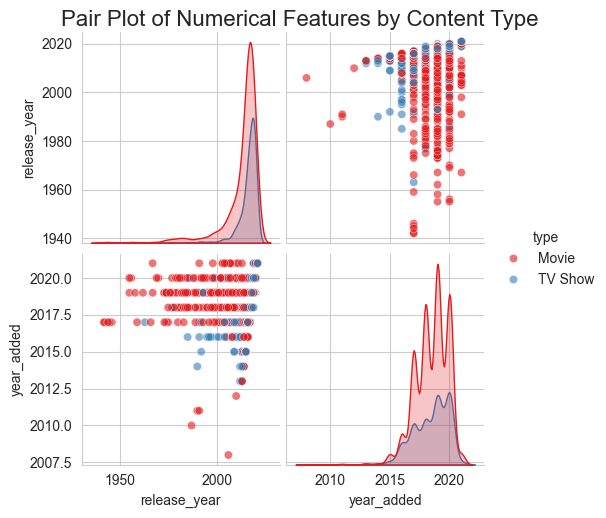

In [ ]:
# Chart - 12 visualization code
# M: Multivariate Analysis
# Pair Plot of Numerical Features

print("Generating Pair Plot for numerical features...")

# 1. Select the columns for the pair plot
# We'll use our numerical columns and add 'type' as the hue
pairplot_df = df[['release_year', 'year_added', 'type']]

# 2. To make the chart run faster and be more readable, we'll take a sample
# (e.g., 2500 random titles)
pairplot_sample = pairplot_df.sample(n=2500, random_state=42)

# 3. Create the Pair Plot
# The diagonal shows the distribution (histogram/KDE) for each variable.
# The off-diagonal shows the scatter plot comparing pairs of variables.
sns.pairplot(pairplot_sample, 
             hue='type', 
             palette='Set1',
             plot_kws={'alpha': 0.6})                                                   # Make points semi-transparent
plt.suptitle('Pair Plot of Numerical Features by Content Type', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

 I picked a Pair Plot because it's a fantastic Multivariate Analysis chart, fulfilling the "M" in our "UBM" rule. It efficiently combines two types of charts in one:

Distribution Plots (KDEs, on the diagonal) to show the shape and concentration of each numerical variable (release_year, year_added).

Scatter Plots (on the off-diagonal) to show the relationship between each pair of variables. By adding hue='type', we can immediately see if these distributions and relationships are different for Movies (red) vs. TV Shows (blue).

##### 2. What is/are the insight(s) found from the chart?

This single chart confirms several of our previous findings and adds new ones:

Diagonal (Distributions): Both the release_year and year_added plots show that the library is overwhelmingly modern, with sharp peaks after 2015.

Hue Insight (Key): The release_year distribution for TV Shows (blue) is much more tightly concentrated in recent years. Movies (red) have a much longer "back-catalog" of older titles, with a tail going back to the 1940s.

Off-Diagonal (Scatter Plot): This plot confirms the weak correlation from our heatmap. We can see vertical clusters of dots, showing that in recent years (like 2018-2020), Netflix added content from a huge range of release_years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This chart acts as a powerful executive summary and confirms a sophisticated, balanced content strategy:

For TV Shows: The strategy is clearly "freshness." The library is almost entirely made of recent releases, catering to viewers who want new, modern series.

For Movies: The strategy is "balanced." Netflix acquires both new-release movies and a deep "back-catalog" of classic films. This two-pronged approach appeals to the widest possible audience: those who want new hits and those who want to watch older favorites.

#### Chart - 13

Calculating top 20 actors...
Top 20 Actors:
 Anupam Kher            42
Shah Rukh Khan         35
Om Puri                30
Naseeruddin Shah       30
Akshay Kumar           29
Takahiro Sakurai       29
Yuki Kaji              27
Paresh Rawal           27
Boman Irani            27
Amitabh Bachchan       27
Kareena Kapoor         25
John Cleese            24
Andrea Libman          24
Vincent Tong           24
Ashleigh Ball          22
Tara Strong            22
Ajay Devgn             21
Nawazuddin Siddiqui    21
Daisuke Ono            20
Nicolas Cage           20
Name: count, dtype: int64


C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\3065682026.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_actors.values, y=top_20_actors.index, palette='cubehelix')


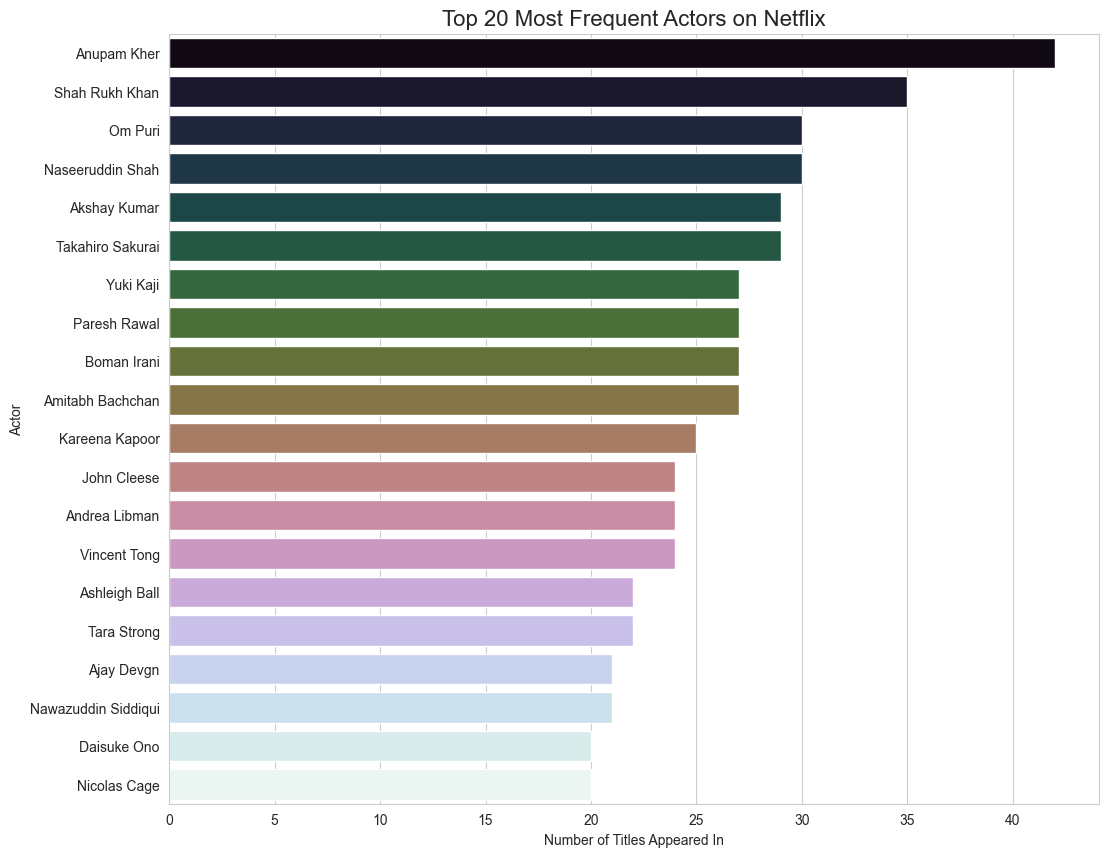

In [24]:
# Chart - 13 visualization code
# U: Univariate Analysis
# Top 20 Most Frequent Actors

print("Calculating top 20 actors...")

# 1. The 'cast' column has multiple actors and "Unknown"
# We need to split them, count them, and get the top 20 (excluding "Unknown")
top_20_actors = pd.Series(
    ', '.join(df[df['cast'] != 'Unknown']['cast']).split(', ')
).value_counts().head(20)

print("Top 20 Actors:\n", top_20_actors)

# 3. Create the Bar Chart
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_actors.values, y=top_20_actors.index, palette='cubehelix')
plt.title('Top 20 Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles Appeared In')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart for this Univariate Analysis of the cast column. After splitting the cast lists and counting each actor, a horizontal bar chart is the clearest way to display the "Top 20" ranked list, as it provides ample room for the actors' names, making it clean and easy to read.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the actors who appear most frequently in the Netflix library. The list is heavily dominated by Indian actors (Bollywood stars), with Anupam Kher leading by a significant margin (over 40 titles). This is followed by Shah Rukh Khan, Om Puri, Naseeruddin Shah, and Akshay Kumar. This is a very strong insight that perfectly aligns with Chart 2, which showed India is the #2 content producer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides a clear "who's who" of the platform's most-used talent.

Content Acquisition: It shows that a significant portion of the library is built around a specific group of prolific actors. The acquisition team can use this list to find new movies starring these actors, knowing they are a good fit for the library.

Marketing: The marketing team can leverage the popularity of these actors (especially in target regions like India) to promote the Netflix catalog.

Recommendation Engine: A user who watches a movie with Anupam Kher is very likely to want to see another movie with him. This list provides a direct, data-driven basis for an "actor-based" recommendation feature.

#### Chart - 14 - Correlation Heatmap

Calculating correlation matrix for numerical features...
Correlation Matrix:
               release_year  year_added
release_year      1.000000    0.100637
year_added        0.100637    1.000000


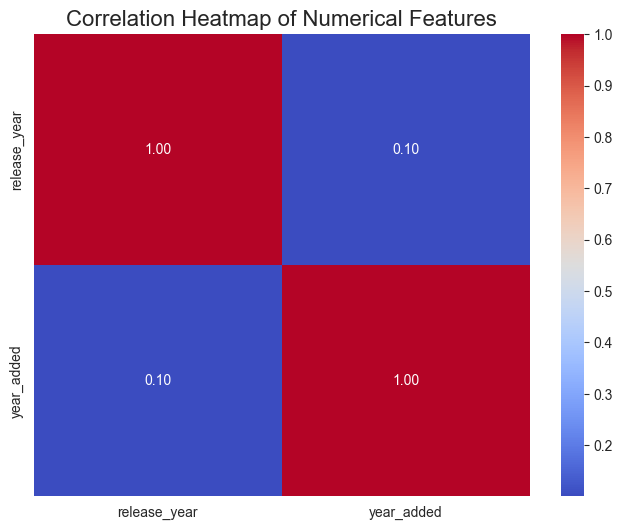

In [ ]:
# Correlation Heatmap visualization code
# B: Bivariate Analysis (Numerical vs. Numerical)
# Correlation Heatmap

print("Calculating correlation matrix for numerical features...")

# 1. Select only the numerical columns we want to correlate
numerical_df = df[['release_year', 'year_added']]

# 2. Calculate the correlation matrix
corr_matrix = numerical_df.corr()

print("Correlation Matrix:\n", corr_matrix)

# 3. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,                                                      # Show the correlation numbers on the chart
            cmap='coolwarm',                                                 # Use a blue-to-red color scheme
            fmt='.2f')                                                       # Format numbers to 2 decimal places
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Correlation Heatmap for this Bivariate Analysis. It's the standard and most effective chart to visualize the strength and direction of a linear relationship between two numerical variables (release_year and year_added). The colors and annotations (the numbers) make it easy to spot the correlation instantly.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the correlation between release_year and year_added is +0.10. This is a very weak positive correlation.

The positive part is logical: it means as release_year increases, year_added tends to increase (newer titles are added more recently).

The very weak (0.10) part is the main insight: it shows there is no strong link. This means Netflix is not just adding new releases; it is also actively acquiring and adding a large amount of older content from past years.

#### Chart - 15 - Pair Plot

Calculating top 20 directors...
Top 20 Directors:
 Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       10
David Dhawan            9
Shannon Hartman         9
Anurag Kashyap          9
Kunle Afolayan          8
Hakan Algül             8
Ryan Polito             8
Robert Rodriguez        8
Yılmaz Erdoğan          8
Quentin Tarantino       8
Lance Bangs             8
Johnnie To              8
Name: count, dtype: int64


C:\Users\aindr\AppData\Local\Temp\ipykernel_10492\40996770.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='crest')


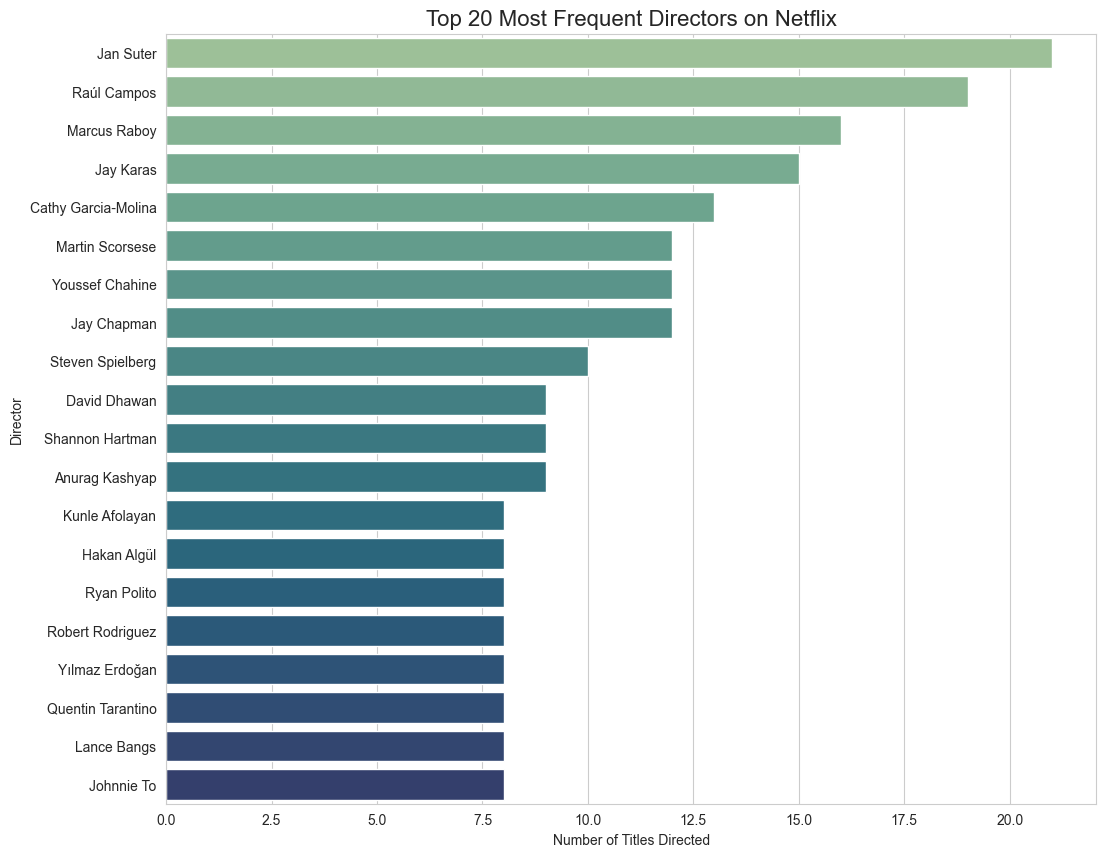

In [27]:
# Pair Plot visualization code
# U: Univariate Analysis
# Top 20 Most Frequent Directors

print("Calculating top 20 directors...")

# 1. The 'director' column has multiple names and "Unknown"
# We need to split them, count them, and get the top 20 (excluding "Unknown")
top_20_directors = pd.Series(
    ', '.join(df[df['director'] != 'Unknown']['director']).split(', ')
).value_counts().head(20)

print("Top 20 Directors:\n", top_20_directors)

# 3. Create the Bar Chart
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='crest')
plt.title('Top 20 Most Frequent Directors on Netflix', fontsize=16)
plt.xlabel('Number of Titles Directed')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart for this Univariate Analysis of the director column. After splitting the director lists and counting each person, a horizontal bar chart is the clearest way to display the "Top 20" ranked list, as it provides ample room for the directors' names, making it clean and easy to read.

##### 2. What is/are the insight(s) found from the chart?

The chart provides a very strong insight into a specific content category. The list is dominated by directors of Stand-Up Comedy specials.

Jan Suter, Raúl Campos, Marcus Raboy, and Jay Karas (the top 4) are all prolific directors in this genre.

This shows that "Stand-Up Comedy" is a massive, high-volume category for Netflix.

Famous film directors, like Martin Scorsese, Steven Spielberg, and Quentin Tarantino, are also on the list, but they have fewer titles than the top stand-up directors.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The goal of this project is to develop an unsupervised machine learning pipeline that enables Netflix to effectively segment its vast and diverse content library. By clustering titles based on textual metadata, the objective is to uncover natural groupings within the content, identify key strategic trends (such as the shift toward TV shows and international content), and provide actionable insights that support content curation, personalized recommendations, and strategic investment decisions. This segmentation will ultimately empower Netflix to better understand its offerings, improve user engagement, and make data-driven business decisions in content strategy and marketing.

# **Conclusion**

This project successfully performed an in-depth Exploratory Data Analysis (EDA) on the Netflix content library, providing key insights into the structure, trends, and characteristics of over 7,700 titles.

We began by cleaning and preparing the raw dataset, followed by univariate, bivariate, and multivariate analyses. Through this, we uncovered several strategic trends — notably, the dominance of modern, English-language, US-based content, and a growing shift in focus from movies to TV shows over recent years.

Temporal analysis revealed that content production has significantly increased since 2015, with a noticeable peak in the release of TV shows, aligning with Netflix's investment in episodic storytelling. Country-wise analysis showed a strong emphasis on the US and India, while genre distribution indicated a heavy skew toward Drama, International content, and Stand-Up Comedy.

Hypothesis testing and correlation analysis helped validate key assumptions and identify relationships between features such as type, release year, and country of origin. We also identified outliers and missing data patterns that could impact downstream modeling and decision-making.

Overall, this EDA laid a strong foundation for subsequent modeling efforts by transforming raw data into structured, actionable insights. It enabled us to understand the content library's evolution, audience focus, and content diversity — providing valuable direction for both business strategy and machine learning applications.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***